In [1]:
## contreras_correia@hotmail.com Time-series analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
import datetime

In [3]:
df = pd.read_csv(r'C:\Users\V0V01S7\Downloads\contreras_correia@hotmail.com.csv')

In [4]:
df = df.dropna()

In [5]:
df['ACTV_START_TS'] = pd.to_datetime(df['ACTV_START_TS'])
df['ACTL_ACTV_END_TS'] = pd.to_datetime(df['ACTL_ACTV_END_TS'])

In [6]:
df['ACTV_START_TIME'] = df['ACTV_START_TS'].apply(lambda x: x.time())
df['ACTV_END_TIME'] = df['ACTL_ACTV_END_TS'].apply(lambda x: x.time())
df.head()

,ACTV_START_TS,EXPC_ACTV_END_TS,ACTL_ACTV_END_TS,ACTV_DT,ACTV_DUR_MIN_QTY,ACTV_START_TIME,ACTV_END_TIME
0,2022-06-10 09:22:21.336,2022-06-10T13:30:00,2022-06-10 09:30:03.174,2022-06-10,7.70,09:22:21.336000,09:30:03.174000
1,2022-06-10 15:23:27.643,2022-06-10T19:00:00,2022-06-10 16:26:42.805,2022-06-10,63.25,15:23:27.643000,16:26:42.805000
2,2022-06-10 12:14:04.937,2022-06-10T16:00:00,2022-06-10 12:16:41.325,2022-06-10,2.62,12:14:04.937000,12:16:41.325000
3,2022-06-10 06:14:03.242,2022-06-10T10:00:00,2022-06-10 06:19:54.028,2022-06-10,5.85,06:14:03.242000,06:19:54.028000
4,2022-06-10 11:23:07.237,2022-06-10T15:30:00,2022-06-10 11:29:22.171,2022-06-10,6.25,11:23:07.237000,11:29:22.171000


In [7]:
end_time = timedelta(hours = df.ACTV_END_TIME[0].hour,minutes = df.ACTV_END_TIME[0].minute,seconds = df.ACTV_END_TIME[0].second)
start_time = timedelta(hours = df.ACTV_START_TIME[0].hour,minutes = df.ACTV_START_TIME[0].minute,seconds = df.ACTV_START_TIME[0].second)
end_time - start_time

datetime.timedelta(seconds=462)

In [8]:
test_df = df.groupby(['ACTV_DT']).sum()
test_df['0-1'] = ""
test_df

,ACTV_DUR_MIN_QTY,0-1
ACTV_DT,,
2021-10-10,332.43,
2021-10-11,756.62,
2021-10-12,857.78,
2021-10-13,521.52,
2021-10-14,239.07,
...,...,...
2022-06-20,164.60,
2022-06-21,171.82,
2022-06-22,510.98,


In [9]:
df['hour_slot'] = df.ACTV_START_TIME.apply(lambda x: x.hour)
df.head()

,ACTV_START_TS,EXPC_ACTV_END_TS,ACTL_ACTV_END_TS,ACTV_DT,ACTV_DUR_MIN_QTY,ACTV_START_TIME,ACTV_END_TIME,hour_slot
0,2022-06-10 09:22:21.336,2022-06-10T13:30:00,2022-06-10 09:30:03.174,2022-06-10,7.70,09:22:21.336000,09:30:03.174000,9
1,2022-06-10 15:23:27.643,2022-06-10T19:00:00,2022-06-10 16:26:42.805,2022-06-10,63.25,15:23:27.643000,16:26:42.805000,15
2,2022-06-10 12:14:04.937,2022-06-10T16:00:00,2022-06-10 12:16:41.325,2022-06-10,2.62,12:14:04.937000,12:16:41.325000,12
3,2022-06-10 06:14:03.242,2022-06-10T10:00:00,2022-06-10 06:19:54.028,2022-06-10,5.85,06:14:03.242000,06:19:54.028000,6
4,2022-06-10 11:23:07.237,2022-06-10T15:30:00,2022-06-10 11:29:22.171,2022-06-10,6.25,11:23:07.237000,11:29:22.171000,11


In [10]:
test_df = df.groupby(by=["ACTV_DT","hour_slot"]).sum()
test_df.to_csv(r'C:\Users\V0V01S7\Desktop\contreras_correia_edited.csv')

In [11]:
test_df

ACTV_DUR_MIN_QTY
ACTV_DT    hour_slot                  
2021-10-10 12                   255.88
           17                    76.55
2021-10-11 5                     23.58
           6                     46.07
           7                    132.42
...                                ...
2022-06-24 5                     37.57
           6                     37.21
           7                     39.53
           8                     42.50
           9                     39.02

[1894 rows x 1 columns]

In [12]:
df['day,hour'] = df['ACTV_START_TS'].apply(lambda x: x.replace(minute=0, second=0, microsecond=0))
df.head()

,ACTV_START_TS,EXPC_ACTV_END_TS,ACTL_ACTV_END_TS,ACTV_DT,ACTV_DUR_MIN_QTY,ACTV_START_TIME,ACTV_END_TIME,hour_slot,"day,hour"
0,2022-06-10 09:22:21.336,2022-06-10T13:30:00,2022-06-10 09:30:03.174,2022-06-10,7.70,09:22:21.336000,09:30:03.174000,9,2022-06-10 09:00:00
1,2022-06-10 15:23:27.643,2022-06-10T19:00:00,2022-06-10 16:26:42.805,2022-06-10,63.25,15:23:27.643000,16:26:42.805000,15,2022-06-10 15:00:00
2,2022-06-10 12:14:04.937,2022-06-10T16:00:00,2022-06-10 12:16:41.325,2022-06-10,2.62,12:14:04.937000,12:16:41.325000,12,2022-06-10 12:00:00
3,2022-06-10 06:14:03.242,2022-06-10T10:00:00,2022-06-10 06:19:54.028,2022-06-10,5.85,06:14:03.242000,06:19:54.028000,6,2022-06-10 06:00:00
4,2022-06-10 11:23:07.237,2022-06-10T15:30:00,2022-06-10 11:29:22.171,2022-06-10,6.25,11:23:07.237000,11:29:22.171000,11,2022-06-10 11:00:00


In [13]:
test_df = df.groupby(by=["day,hour"]).sum()
#test_df = test_df.drop(['hour_slot'],axis=1)
#test_df.to_csv(r'C:\Users\V0V01S7\Downloads\contreras_correia_edited.csv')

In [14]:
time_line = pd.date_range(df['day,hour'].min(),df['day,hour'].max(),freq='H')

In [15]:
time_line = time_line.to_series()

In [16]:
newdf = pd.DataFrame(time_line,columns = ["TIMELINE"])
newdf = newdf.reset_index(drop=True)
newdf["MINUTES_ONLINE"] = ' '

In [17]:
df = df.rename({"day,hour":"TIMELINE"},axis=1)

In [18]:
test_df.head()

,ACTV_DUR_MIN_QTY,hour_slot
"day,hour",,
2021-10-10 12:00:00,255.88,24
2021-10-10 17:00:00,76.55,17
2021-10-11 05:00:00,23.58,5
2021-10-11 06:00:00,46.07,6
2021-10-11 07:00:00,132.42,7


In [19]:
newdf2 = pd.merge(newdf,df,how="left",on=["TIMELINE"])
newdf2 = newdf2.drop(columns = ["MINUTES_ONLINE","ACTV_START_TS","EXPC_ACTV_END_TS","ACTL_ACTV_END_TS","ACTV_DT","ACTV_START_TIME","ACTV_END_TIME","hour_slot"],axis=1)

newdf2.head()

,TIMELINE,ACTV_DUR_MIN_QTY
0,2021-10-10 12:00:00,7.18
1,2021-10-10 12:00:00,248.70
2,2021-10-10 13:00:00,NaN
3,2021-10-10 14:00:00,NaN
4,2021-10-10 15:00:00,NaN


In [20]:
newdf2 = newdf2.groupby("TIMELINE").sum()
newdf2 = newdf2.reset_index(drop=False)
newdf2.head()

,TIMELINE,ACTV_DUR_MIN_QTY
0,2021-10-10 12:00:00,255.88
1,2021-10-10 13:00:00,0.00
2,2021-10-10 14:00:00,0.00
3,2021-10-10 15:00:00,0.00
4,2021-10-10 16:00:00,0.00


In [ ]:
plt.plot(newdf2["TIMELINE"],newdf2["ACTV_DUR_MIN_QTY"])

In [ ]:
pip install seaborn

In [22]:
import seaborn as sns

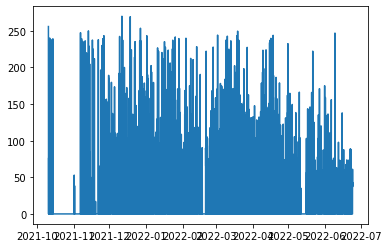

In [25]:
plt.plot(newdf2["TIMELINE"],newdf2["ACTV_DUR_MIN_QTY"])